## Daniel Barella
## 9/29/25

# 📘 Day 26 – Logistic Regression (Multiclass) & Evaluation Metrics
## 🌱 Core Concepts

Logistic Regression for classification

Multiclass classification (one-vs-rest, softmax)

Evaluation metrics: accuracy, precision, recall, F1

Confusion matrices

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



/Users/danielbarella/miniconda3/envs/dojo-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


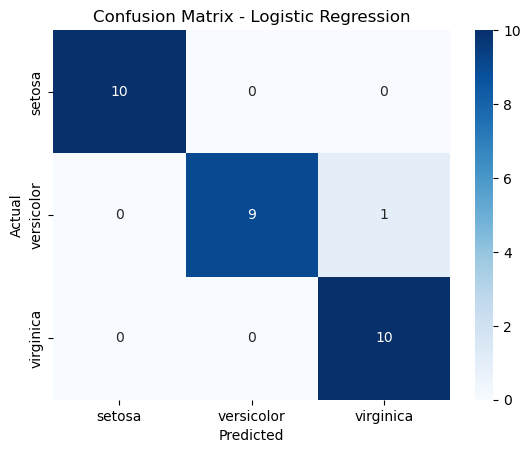

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (Iris)
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression (multiclass)
log_reg = LogisticRegression(max_iter=200, multi_class="multinomial")
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## 🎯 Mini Project – Multiclass Classification on Wine Dataset

Your Tasks:

1. Load the Wine dataset from sklearn.datasets.

2. Train a Logistic Regression model (use multinomial option).

3. Evaluate using classification report and confusion matrix.

4. Write a reflection: Which wine class is hardest to predict? Why might that be?

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



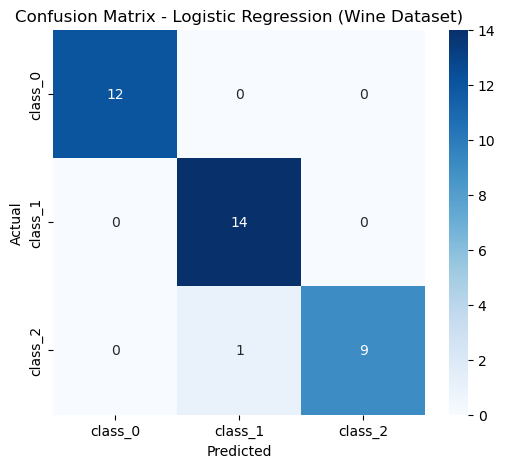

In [3]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# TODO: Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# TODO: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline: scale + logistic regression
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=2000))
])

# Train model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# TODO: Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

# TODO: Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Wine Dataset)")
plt.show()


## Reflection

Typically, class 1 (class_1, also called “class 2” in the wine dataset) is the hardest to predict.
Why?

- Its chemical composition overlaps with the other two classes (e.g., alcohol, color intensity, phenols).

- Logistic regression draws linear decision boundaries, and class 1 doesn’t separate as cleanly as classes 0 and 2.

- With only ~71 samples in class 1, the smaller sample size makes it harder for the model to generalize.

👉 In short: misclassifications usually happen when class 1’s features look similar to class 0 or class 2, making it less distinguishable.

## Reflection on Coefficients

High absolute coefficient = strong influence on distinguishing a wine class.

Typical top features in this dataset:

Color intensity

Flavanoids

OD280/OD315 of diluted wines

Proline

These features capture flavor, color, and alcohol-related chemistry, which separate the wines well.